# Creating Customer Segments

In this project we will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

In [130]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print
print data.head()  # print the first 5 rows

Dataset has 440 rows, 6 columns

   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


In [131]:
print "\nBasic statistics:\n", data.describe()


Basic statistics:
               Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000  


## Feature Transformation

**1) In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.**

**Answer:**

PCA will use the features with higher variance to build the components. Given the descriptive statistics, the Fresh feature has the highest standard deviation (12647.329) and the largest range in values (min=3.0 and max= 112151.0). Based on the descriptive statistic we could expect Fresh, Grocery and Milk to be highly important for the first and the second PCA components.

By definition the vectors that show up as ICA dimensions are independent. ICA focus on the independent factors. ICA needs features that best separate different types of customers according to their purchasing behaviors. Different types of customers (customer with similar purchasing behaviors, unique behaviors and large enough) will be identified as an independent component.

#### Helper Functions

In [132]:
def create_heatmap(components, columns):
    import seaborn as sns
    
    data = pd.DataFrame(components, columns = list(columns))
    
    # Print the components and the amount of variance in the data contained in each dimension
    # print data
    
    sns.heatmap(data,annot=True)   

def create_clusters(reduced_data, n_clusters, clusterName): 
    
    # TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
    # TODO: Find the centroids for KMeans or the cluster means for GMM 
    
    if clusterName == 'KMeans':
        clusters = KMeans(n_clusters)
        clusters.fit(reduced_data)
        centroids = clusters.cluster_centers_
    
    if clusterName == 'GMM':
        clusters = GMM(n_components=n_clusters)
        clusters.fit(reduced_data)
        centroids = clusters.means_
             
    
    print "Clusters: "
    print clusters
    
    print "Centroids: "
    print centroids
    
    
    # Obtain labels for each point in mesh. Use last trained model.
    Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    

    show_plot(reduced_data, centroids, xx, yy, Z)
    
    return clusters
    
    
# Put the result into a color plot
def show_plot(reduced_data, centroids, xx, yy, Z):   
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    
    plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
              'Centroids are marked with white cross')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    # plt.xlabel('Fresh')
    # plt.ylabel('Non-Fresh')
    plt.show()

### PCA

Definitions:
* **PCA Components:** Principal axes in feature space, representing the directions of maximum variance in the data.
* **PCA Explained Variance Ratio:** Percentage of variance explained by each of the selected components. If n_components is not set then all components are stored and the sum of explained variances is equal to 1.0


PCA Explained Variance Ratio
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


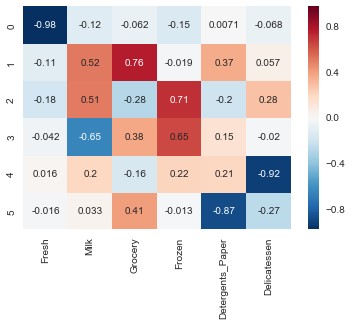

In [133]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=len(data.columns))
pca.fit(data)

#PCA Components 
create_heatmap(pca.components_, data.columns)

print "\nPCA Explained Variance Ratio"
print pca.explained_variance_ratio_

# http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

**2)** **How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?**

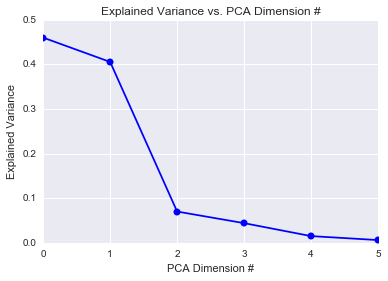

In [134]:
# Plot the PCA Explained Variance Ratio as function of PCA dimension number
plt.plot(pca.explained_variance_ratio_, 'bo-') # 'bo-', 'r--', 'bs', 'g^', '-'

plt.title('Explained Variance vs. PCA Dimension #')
plt.xlabel('PCA Dimension #')
plt.ylabel('Explained Variance')

plt.show()

**Answer:** 

From the above plot, we can see the drop-off after the second principle component. The PCA's explained variance ratio drops of significantly after the second principle component/dimension. The first and second principle components explain 46% and 41% of the total variance, and the third principle component explains only 7% of the total variance.

If I were to use PCA on this dataset for my analysis, based on the above numbers and insights, I would choose 2 dimensions. Using 2 dimensions only has an advantage for easy visualization, since 2 dimensional plots are more intuitive for people to understand.

**3)** **What do the dimensions seem to represent? How can you use this information?**

[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
[-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]


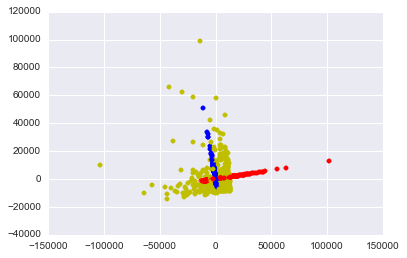

In [135]:
first_pca = pca.components_[0]
second_pca = pca.components_[1]

print first_pca
print second_pca

transformed_data = pca.transform(data)
plt.close()

for item in transformed_data:
    plt.scatter(first_pca[0]*item[0], first_pca[1]*item[0], color="r")
    plt.scatter(second_pca[0]*item[1], second_pca[1]*item[1], color="b")
    plt.scatter(item[0], item[1], color="y")
    
plt.show()


**Answer:** 

Each dimension represents one principal component. 

**First Principle Component:** Looking at the first principle component, we see the value corresponding to **Fresh is -0.9765** and all other values are much closer to 0. 

**Second Principle Component:** The second principle component (dimension) seems to represent a weighted combination of **Grocery (0.765)**, **Milk (0.516)**, and **Detergents Paper (0.365)**. This component explains the variations among the important products (except Fresh).

From the analysis above, it seems we can determine our customer segments using just these two dimensions **(Fresh and Non-Fresh)**. Using the two principle components described above, we can run unsupervised clustering algorithms to discover customer segments.

### ICA

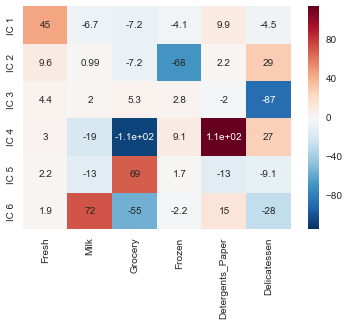

In [136]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
centered_data = scaler.fit_transform(data)

ica = FastICA()
ica.fit_transform(centered_data)

# Print the independent components
# Sort ICA components by the Fresh feature (changing the Fresh vector to positive) and then sort by Fresh
# Sorting will help to see that ICA is consistent among different runs

icaResults = pd.DataFrame(ica.components_)
icaResults.columns = data.columns.values
icaResults[icaResults["Fresh"] < 0] *= -1.0
icaResults *= 100. # ica coefficients as % of the scaled features
icaResults.sort_values(by=['Fresh'], ascending = [0], inplace=True)
icaResults.index = ["IC 1", "IC 2", "IC 3", "IC 4", "IC 5", "IC 6"]

create_heatmap(icaResults, data.columns)

**4)** **For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?**

**Answer:** 

Since the ICA algorithm seems to be pretty consistent among different runs, we can conclude that there is
some kind of customer behavior pattern. Each independent component is driven by one type of product with slightly or strong and negative or positive correlation with other products.  

* **Independent Component 1:** driven by the **Fresh** products. A customer with strongly spending on frozen products and average spending on all other products.

* **Independent Component 2:** driven prevalently by **Frozen** products with a **negative correlation to Delicatessen**. 

* **Independent Component 3:** driven by the **Delicatessen** products spending. 

* **Independent Component 4:** an independent component of customers with a **strong negative correlation between Grocery** and **Detergents Paper**. Customer who buy much more Grocery and much less Detergents, or vice versa.

* **Independent Component 5:** driven by **Grocery** spending, **slightly negatively correlated with Milk**

* **Independent Component 6:** driven by **Milk** spending **negatively correlated by Grocery** and **slightly negatively correlated with Delicatessen**

## Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

### Choose a Cluster Type

**5) What are the advantages of using K Means clustering or Gaussian Mixture Models?**

**Answer:**

###### K-Means
* Hard clustering. Sharp decision boundaries. Each point always belongs to only one cluster (class).
* Only provide information about which cluster a data point belongs to. 
* No information about the likelihood/probability of the data point belonging to said cluster
* Fast way to perform clustering (in terms of computational time)
* Strong sensitive to outliers
* This algorithm will not always converge to the same final clusters. The final clusters will depend on the starting centroids. Run more times in order to find what could be the best cauterization.

###### Gausian Mixture Models
* Soft clustering
* Provide information about which cluster a data point belongs to
* Provide information about the likelihood/probability  of that a particular data point belongs to said cluster
* Runs slower than K-Menas (GMM requires more computation time)
* Can calculate more complex decision boundaries compared to K-Means


**6) Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.**

In [137]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [138]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
reduced_data = PCA(n_components=2).fit_transform(data)
print reduced_data[:10]  # print upto 10 elements

[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]


In [139]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# meshgrid -- Return coordinate matrices from coordinate vectors.

Clusters: 
GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=4, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)
Centroids: 
[[  2339.15204219  -6708.93065712]
 [  7174.54719282   5469.02876453]
 [-15372.37194307  -3334.43379857]
 [ -9486.9742574   34645.20428228]]


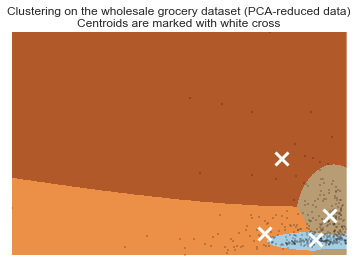

In [140]:
modelName = 'GMM' # 'KMeans'
# clusters = create_clusters(reduced_data, 3, modelName)
# clusters = create_clusters(reduced_data, 5, modelName)
clusters = create_clusters(reduced_data, 4, modelName)

In [141]:
Z = clusters.predict(reduced_data)
def sample_data(Z, label):
    cluster_samples = np.where(Z == label)[0]
    cluster_samples = np.random.choice(cluster_samples, replace=False, size=5)
    
    samples = cluster_samples.tolist()
    samples.sort()
    
    return data.iloc[samples, :]

for i in range(4):
    print "Cluster {}:\n{}\n".format(i, sample_data(Z, i))

Cluster 0:
     Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
58   13779  1970     1648     596               227           436
75   20398  1137        3    4407                 3           975
130   7149  2428      699    6316               395           911
177  12759  7330     4533    1752                20          2631
364   2615   873     1524    1103               514           468

Cluster 1:
     Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
1     7057   9810     9568    1762              3293          1776
7     7579   4956     9426    1669              3321          2566
254  10379  17972     4748    4686              1547          3265
302   2886   5302     9785     364              6236           555
317   1182   3088     6114     978               821          1637

Cluster 2:
     Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
52   40721   3916     5876     532              2587          1278
141  30379  13252     5189     32

5 or 10 Sampels were not enough for me to make conslusion. So, I deceided to check the mean values of all data points so I can get more insights and make valuable conclusions. 

In [142]:
def get_pop(Z, label):
    cluster_samples = np.where(Z == label)[0]
    samples = cluster_samples.tolist()
    
    return data.iloc[samples, :]

for i in range(4):
    pop = get_pop(Z, i)
    mean = pop.mean()
    print "\n******** Cluster {} Mean ********".format(i)
    print mean



******** Cluster 0 Mean ********
Fresh               10142.481132
Milk                 2133.806604
Grocery              2548.066038
Frozen               3065.603774
Detergents_Paper      506.438679
Delicatessen          959.080189
dtype: float64

******** Cluster 1 Mean ********
Fresh                4393.328671
Milk                 8573.510490
Grocery             12364.937063
Frozen               1803.139860
Detergents_Paper     5123.552448
Delicatessen         1423.433566
dtype: float64

******** Cluster 2 Mean ********
Fresh               32527.764706
Milk                 5569.102941
Grocery              7539.838235
Frozen               5378.044118
Detergents_Paper     1685.500000
Delicatessen         2350.205882
dtype: float64

******** Cluster 3 Mean ********
Fresh               17046.529412
Milk                29016.411765
Grocery             39851.588235
Frozen               4599.176471
Detergents_Paper    18424.117647
Delicatessen         6132.529412
dtype: float64


**7 What are the central objects in each cluster? Describe them as customers.**

**Answer:** 

The central objects in each cluster are the centroids. They represent an average customer within that cluster. Based on the PCA analysis the first component was responsible for Fresh variable, and the second component was the linear combination of mostly three features: Milk, Grocery and Detergents (Non-Fresh).

Having run K-Means and GMM several times with different number of components I decided to go with 4 as number of clusters.  Also I decided do go with cluster with soft boundaries (GMM) because I liked the way the cluster was separating the customers. I was no able to get those boundaries with K-means. Mean values gave me more meaningful values about each cluster.

* **Cluster 0: Important customers who spend a lot on Fresh Food.**  Customers interested in Fresh products. Small amount. These could be considered as important (loyal) customers interested in Fresh products.

* **Cluster 1: Small Grocery Stores.** Sales more groceries than other types of products, but it does not sell as many groceries as Cluster 3. 

* **Cluster 2: Restaurants. Salad Bars.** Customers interested in Fresh products. Big Amount. Possibly restaurants because of low Grocery Milk and Detergents values and a big range of Fresh values.

* **Cluster 3: Chain supermarkets.** These customer have significant spending. It looks like they sell a lot of everything. 


### Conclusions

** 8) Which of these techniques did you feel gave you the most insight into the data?**

**Answer:**

##### PCA and ICA (valuable insights: what most people buy; similar buying patterns)
PCA and ICA gave me different valuable insights. By using PCA we understand what people are interested in (what most people buy). This is important and useful and it gives us the direction to look at. But we still can't find the reason why there are unexpected customers complaints. ICA gives us the power to analyze independent customer segments and their behaviors. ICA is helpful in understanding the potential group of independent customers. Customer with similar buying patterns. 

##### Feature reduction
Using PCA for feature reduction is really useful, it allows us to display our data even if the data is of high dimensionality. The variance in the data being quite important, PCA resulted in being powerful approach to be able to limit the number of dimensions used. Using PCA and ICA, we get deeper understanding of the data.


##### Plotting
Plotting all values was really helpful. Plotting the output of the cluster models algorithm gave me the most insight into the data. The plot using GMM clustering made more intuitive sense, in terms of valid clustering decision boundaries. 

**9) How would you use that technique to help the company design new experiments?**

**Answer:** 

We can use small samples of customers from each cluster when conducting a new experiment on a possible change. That way we can see how each of the clusters would react to the change. If the sample from a cluster liked the change, we could implement the change for all members of the cluster.

To test the effects of changing from regular morning delivery to bulk evening delivery, the company can run A/B tests on each customer segments separately. The company can test how each customer type react on the time delivery change (regular morning delivery to a cheaper bulk evening delivery).

If the change went well for the sample from a particular cluster, it would make sense to consider implementing the change for all the members of that cluster. If the change didn't go well for the sample from a particular cluster, it would make sense to not implement the change for the members of that cluster.

**10) How would you use that data to help you predict future customer needs?**

**Answer:** 

By knowing the different customer groups (clusters) the business can better tailor its services to individual customer segments without necessarily combine them all to the same group as one. Using the GMM or KMeans model we can label each new customer. That way we can predict what will work best for each new customer. What type of products, delivery time and other policies they will likely to have. Supervised learning techniques such as classification could assign new customers to the already known clusters to better understand their needs and provide better targeted services to them.